## Connect to Gene Ontology terms.

This notebook showcases the functionality of Omniflow that connects the existing nodes of a network to a phenotype of interest. 

In [1]:
%%time
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op

/home/eirini/anaconda3/envs/neko_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CPU times: user 1.55 s, sys: 335 ms, total: 1.88 s
Wall time: 2.07 s


### 1. Build network

For the explanation of the individual steps, please consult the "XX" notebook.

In [2]:
genes = ["SRC", "NOTCH1", "FAK", "CDH1", "CDH2", "VIM", "MAP4K4", "LATS1", "LATS2", "PTK2B"]

In [3]:
new_net1 = Network(genes)

Loading deafault omnipath all interactions


In [4]:
%%time
new_net1.connect_nodes(only_signed=True, consensus_only=True)

P12931 Q05397
P12931 P19022
P12931 Q14289
Q14289 Q05397
CPU times: user 906 ms, sys: 11.5 ms, total: 918 ms
Wall time: 916 ms


In [5]:
%%time
new_net1.complete_connection(mode="ALL", maxlen=6, k_mean="tight", only_signed=True, connect_node_when_first_introduced=True, consensus=True)

looking for paths in the network with length:  0  for node  SRC  and  NOTCH1
looking for paths in the network with length:  1  for node  SRC  and  NOTCH1
looking for paths in the network with length:  2  for node  SRC  and  NOTCH1
looking for paths in the network with length:  3  for node  SRC  and  NOTCH1
looking for paths in the network with length:  4  for node  SRC  and  NOTCH1
looking for paths in the network with length:  5  for node  SRC  and  NOTCH1
looking for paths in the network with length:  6  for node  SRC  and  NOTCH1
i_search =  3
Looking for paths with length:  0  for node  SRC  and  NOTCH1
i_search =  3
Looking for paths with length:  1  for node  SRC  and  NOTCH1
i_search =  3
Looking for paths with length:  2  for node  SRC  and  NOTCH1
[['SRC', 'DAB1', 'NOTCH1'], ['SRC', 'CTNNB1', 'NOTCH1']]
P12931 O75553
O75553 P46531
P12931 P35222
P35222 P46531
P12931 Q05397
P12931 P19022
P12931 Q14289
P12931 O75553
P12931 P35222
O75553 P46531
P35222 P46531
Q14289 Q05397
P12830 P

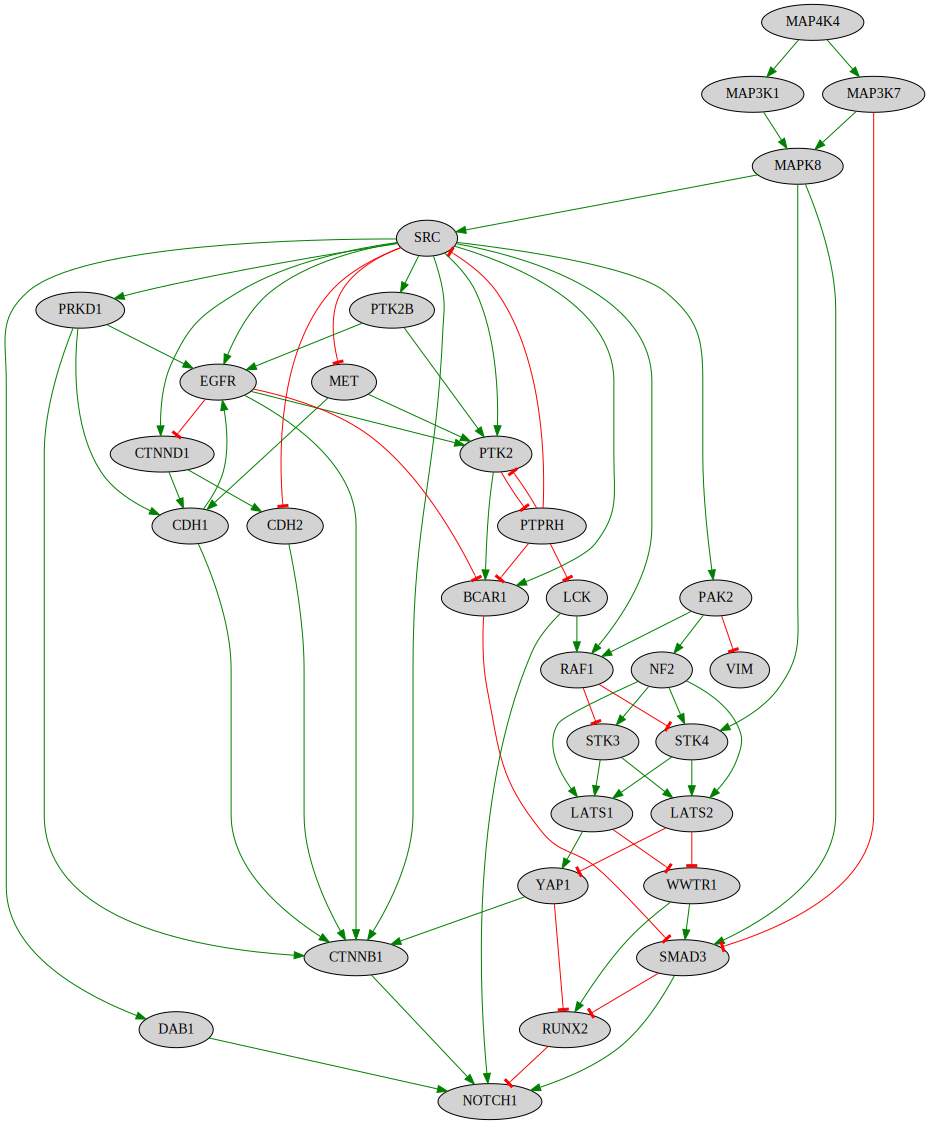

In [6]:
#Visualize network
visualizer1 = NetworkVisualizer(new_net1, color_by='effect')
visualizer1.render(output_file='network2')

### 2. Connect to Gene Ontology (GO) term

Connect the nodes of the Network with markers of a certain phenotype, from Gene Ontology. 

The _connect_genes_to_phenotype_ function will look for interactions between the nodes of the network and genes annotated with a GO term of interest. The argument _compress_ replaces the individual phenotype-specific genes into one phenotype node.

We suggest to the users to choose gene ontology terms lower in the hierarcy (e.g., execution phase of apoptosis _versus_ apoptosis) to avoid the inclusion of too many genes.

In [7]:
%%time
new_net1.connect_genes_to_phenotype(id_accession="GO:0097194", phenotype="execution phase of apoptosis", only_signed=True, compress=True, maxlen=1)

Start requesting genes from Gene Ontology
Fetching from:  https://golr-aux.geneontology.io/solr/select?defType=edismax&qt=standard&indent=on&wt=csv&rows=100000&start=0&fl=bioentity_label&facet=true&facet.mincount=1&facet.sort=count&json.nl=arrarr&facet.limit=25&hl=true&hl.simple.pre=%3Cem%20class=%22hilite%22%3E&hl.snippets=1000&csv.encapsulator=&csv.separator=%09&csv.header=false&csv.mv.separator=%7C&fq=document_category:%22annotation%22&fq=isa_partof_closure:%22GO:0097194%22&fq=taxon_subset_closure_label:%22Homo%20sapiens%22&fq=type:%22protein%22&fq=annotation_class_label:%22execution%20phase%20of%20apoptosis%22&facet.field=aspect&facet.field=taxon_subset_closure_label&facet.field=type&facet.field=evidence_subset_closure_label&facet.field=regulates_closure_label&facet.field=isa_partof_closure_label&facet.field=annotation_class_label&facet.field=qualifier&facet.field=annotation_extension_class_closure_label&facet.field=assigned_by&facet.field=panther_family_label&q=*:*
Done
Starting c

KeyError: 'form_complex'

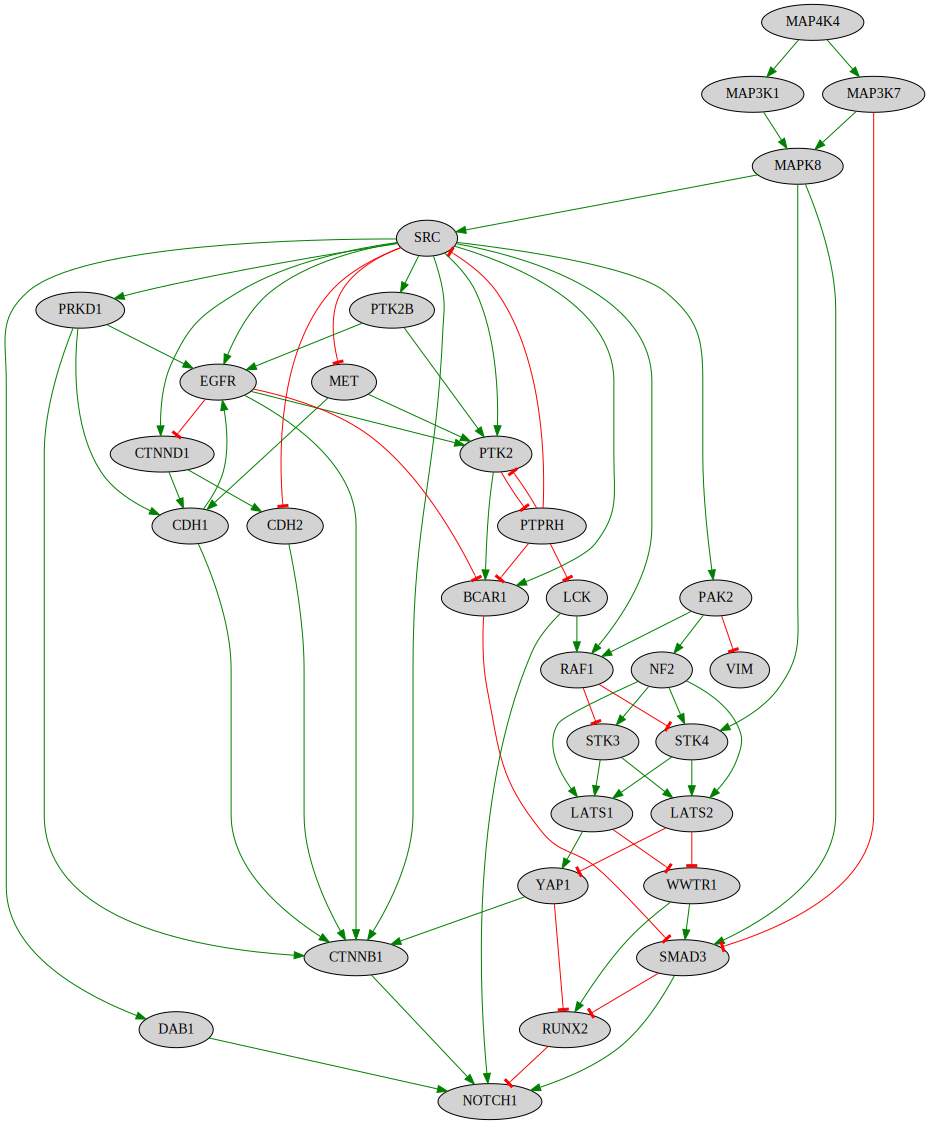

In [8]:
#Visualize network
visualizer1 = NetworkVisualizer(new_net1, color_by='effect')
visualizer1.render(output_file='network2')